# Model Analytics

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pickle

# Custom python file imports
import util
import model as model_file


In [11]:
# Helper functions

# These plots will have to change since our model was trained without 
# using validation data:

def plot_loss_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
  plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  # plt.axis([1, 20, 0, 0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)

def plot_accuracy_learning_curves(loss, val_loss):
  plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training Accuracy")
  plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation Accuracy")
  plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
  # plt.axis([1, 20, 0, 0.05])
  plt.legend(fontsize=14)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.grid(True)

def load_pkl_model_history(pkl_file_name):
  with open(pkl_file_name, "rb") as file_pi:
    history = pickle.load(file_pi)

  return history

### Model One Analysis

In [13]:
model_one = util.load_keras_model("GRU_model_1")

print(model_one.summary())


2023-03-24 10:54:59.178247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 10:55:02.055060: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-24 10:55:02.073336: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 4 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-24 10:55:02.555988: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2023-03-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1408000   
                                                                 
 gru (GRU)                   (None, None, 128)         99072     
                                                                 
 batch_normalization (BatchN  (None, None, 128)        512       
 ormalization)                                                   
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,606,785
Trainable params: 1,606,529
Non-trainable params: 256
____________________________________________

#### Evaluating Model on Crane:
 * put data here *

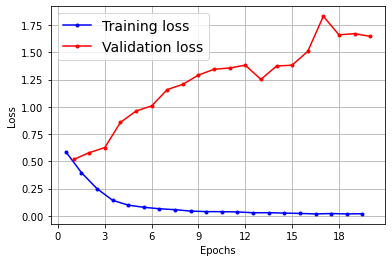

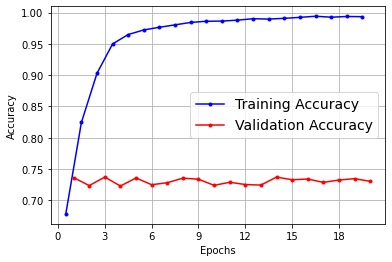

In [12]:
model_one_history = load_pkl_model_history("GRU_model_1_history.pkl")

plot_loss_learning_curves(model_one_history["loss"], model_one_history["val_loss"])
plt.show()

plot_accuracy_learning_curves(model_one_history["accuracy"], model_one_history["val_accuracy"])
plt.show()